In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tf.__version__

'1.15.0'

In [0]:
from tensorflow.examples.tutorials.mnist  import input_data

In [5]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [6]:
mnist.train.images.shape

(55000, 784)

In [7]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [8]:
mnist.test.images.shape

(10000, 784)

In [9]:
mnist.validation.images.shape

(5000, 784)

In [10]:
mnist.train.images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [11]:
mnist.train.images[0].shape

(784,)

In [13]:
mnist.train.images[0].reshape(28, 28).shape

(28, 28)

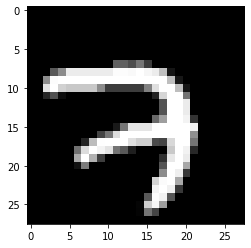

In [15]:
plt.imshow(mnist.train.images[0].reshape(28, 28), cmap="gray")

In [16]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


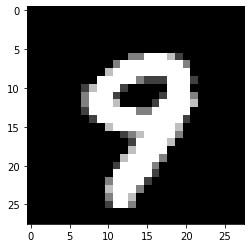

In [18]:
print(mnist.train.labels[999])
plt.imshow(mnist.train.images[999].reshape(28, 28), cmap="gray")

In [0]:
x = tf.placeholder(tf.float32, shape=[None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [0]:
y = tf.nn.softmax(tf.matmul(x, W)+ b)

In [0]:
y_ =tf.placeholder(tf.float32, shape=[None,  10])

In [0]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ -tf.log(y), reduction_indices=[1]))

In [0]:
train_step = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cross_entropy)

In [0]:
sess = tf.InteractiveSession()

In [0]:
tf.global_variables_initializer().run()

In [0]:
for i in range (10):
  batch_x, batch_y = mnist.train.next_batch(100)
  #print(batch_x.shape, batch_y.shape)
  sess.run(train_step, feed_dict={x: batch_x, y_: batch_y})

In [0]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_ , 1))

In [0]:
acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [45]:
acc

<tf.Tensor 'Mean_1:0' shape=() dtype=float32>

In [46]:
sess.run(acc, feed_dict={x: mnist.test.images, y_: mnist.test.labels})

0.098

In [0]:
sess.close()